<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS

# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

## The sigmoid function
The so called [logit](https://en.wikipedia.org/wiki/Logit) function is the inverse of the [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function, which is a special case of the [logistic](https://en.wikipedia.org/wiki/Logistic_function) function. It is very common to see these terms being used interchangeably.

$$
f(x) = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}
$$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
sigmoid(0)

0.5

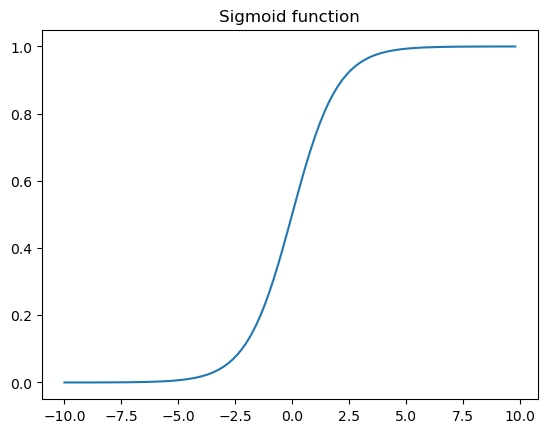

In [4]:
x = np.arange(-10., 10., 0.2)
y = sigmoid(x)

plt.plot(x, y)

plt.title('Sigmoid function')

plt.show()

## Cross-entropy

$$CE = -\frac{1}{n}\sum_{i}^{n}{y \log{\hat{y}_i} + (1-y_i) \log{(1-\hat{y}_i)}}$$

In [5]:
def ce(y_pred, y):
    return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)

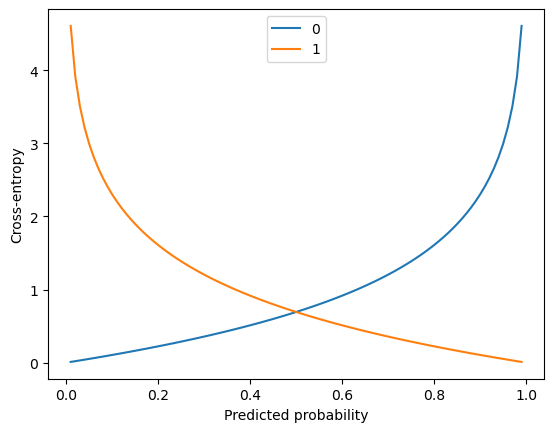

In [6]:
p = np.linspace(0.01, 0.99, 99)

plt.plot(p, ce(p, np.zeros(len(p))))
plt.plot(p, ce(p, np.ones(len(p))))

plt.xlabel('Predicted probability')
plt.ylabel('Cross-entropy')
plt.legend([0, 1], loc='upper center')

plt.show()

In [7]:
df = pd.read_excel('data/loans.xlsx')
df

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
...,...,...,...,...,...,...,...
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0


In [8]:
model = smf.logit('default ~ inquiries', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.429945
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 9516
Model:                          Logit   Df Residuals:                     9514
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                 0.02151
Time:                        10:53:46   Log-Likelihood:                -4091.4
converged:                       True   LL-Null:                       -4181.3
Covariance Type:            nonrobust   LLR p-value:                 5.051e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9300      0.036    -53.517      0.000      -2.001      -1.859
inquiries      0.1506      0.011     13.275      0.000       0.128       0.173
==============================================================================
"""

In [9]:
pred = model.predict(df)
pred

0       0.126753
1       0.126753
2       0.144385
3       0.144385
4       0.126753
          ...   
9511    0.164009
9512    0.235631
9513    0.326322
9514    0.235631
9515    0.263833
Length: 9516, dtype: float64

In [10]:
def predict(coef, x):
    return sigmoid(model.params['Intercept'] + coef * x)

predict(model.params['inquiries'], df['inquiries'])

0       0.126753
1       0.126753
2       0.144385
3       0.144385
4       0.126753
          ...   
9511    0.164009
9512    0.235631
9513    0.326322
9514    0.235631
9515    0.263833
Name: inquiries, Length: 9516, dtype: float64

In [11]:
def ce(y_pred, y):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

ce(pred, df['default'])

0.4299445005162989

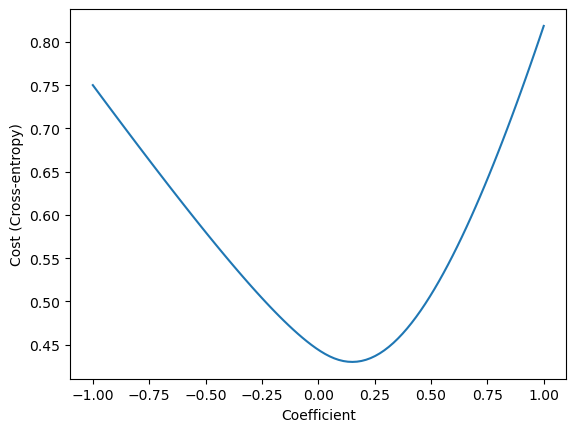

In [12]:
coefs = np.linspace(-1, 1, 100)

cost = []
for c in coefs:
    pred = predict(c, df['inquiries'])
    cost.append(ce(pred, df['default']))

plt.plot(coefs, cost)
plt.xlabel('Coefficient')
plt.ylabel('Cost (Cross-entropy)')

plt.show()

## Confusion matrix

In [13]:
X = df.drop(columns='default')
y = df['default']

model = LogisticRegression(solver='liblinear').fit(X, y)

ce(model.predict_proba(X)[:, 1], y)

0.42142583914168774

In [14]:
model.predict_proba(X)

array([[0.84368991, 0.15631009],
       [0.87759655, 0.12240345],
       [0.84578309, 0.15421691],
       ...,
       [0.72104404, 0.27895596],
       [0.77182962, 0.22817038],
       [0.69177014, 0.30822986]])

In [15]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [17]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
model.predict_proba(X_test)

array([[0.82347408, 0.17652592],
       [0.83377518, 0.16622482],
       [0.87780863, 0.12219137],
       ...,
       [0.90322532, 0.09677468],
       [0.76683013, 0.23316987],
       [0.770982  , 0.229018  ]])

## Accuracy

In [19]:
# Proportion of correct predictions.
accuracy = (predictions == y_test).mean()
accuracy

0.8366596638655462

In [20]:
model.score(X_test, y_test)

0.8366596638655462

In [21]:
# True positives.
tp = pd.Series(predictions == 1) & (y_test == 1).reset_index(drop=True)

# True negatives.
tn = pd.Series(predictions == 0) & (y_test == 0).reset_index(drop=True)

# False positives.
fp = pd.Series(predictions == 1) & (y_test == 0).reset_index(drop=True)

# False negatives.
fn = pd.Series(predictions == 0) & (y_test == 1).reset_index(drop=True)

tp, tn, fp, fn

(0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1899    False
 1900    False
 1901    False
 1902    False
 1903    False
 Length: 1904, dtype: bool,
 0       False
 1        True
 2        True
 3        True
 4        True
         ...  
 1899     True
 1900    False
 1901    False
 1902     True
 1903     True
 Length: 1904, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1899    False
 1900    False
 1901    False
 1902    False
 1903    False
 Length: 1904, dtype: bool,
 0        True
 1       False
 2       False
 3       False
 4       False
         ...  
 1899    False
 1900     True
 1901     True
 1902    False
 1903    False
 Length: 1904, dtype: bool)

In [22]:
tp.sum(), tn.sum(), fp.sum(), fn.sum()

(6, 1587, 10, 301)

In [23]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,1587,10
1,301,6


In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(1587, 10, 301, 6)

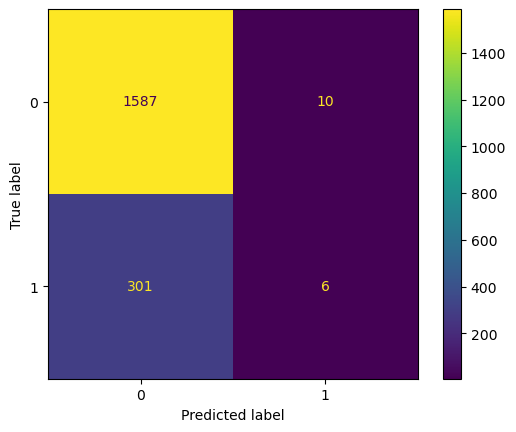

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, predictions)

plt.show()

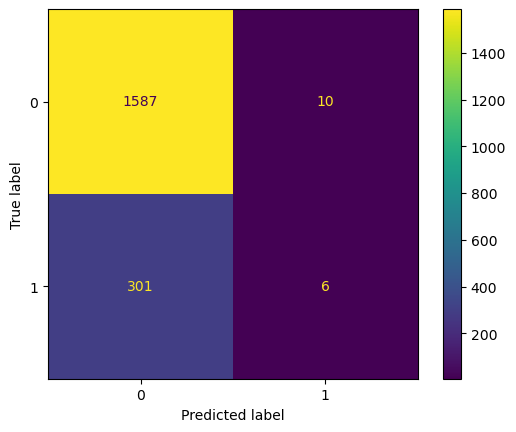

In [26]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

plt.show()

In [27]:
precision = tp / (tp + fp) # True positives vs all predicted positives.
recall = tp / (tp + fn) # True positives vs all actual positives.
f1_score = 2 * precision * recall / (precision + recall) # Harmonic mean.

precision, recall, f1_score

(0.375, 0.019543973941368076, 0.03715170278637771)